In [1]:
# Basic setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.use('SVG', warn=False)  # set output to svg

# set rcParams to output text as editable fonts
mpl.rcParams['svg.fonttype'] = 'none' 
mpl.rcParams['pdf.fonttype'] = 42

# utility function to make nice margins for graphics
def make_margins(width, height, left=0, right=0, top=0, bottom=0, margins=None):
    """Create Matplotlib margins. Returns tuple that can be unpacked for subplots_adjust with *
    Args:
        width, height: figure size
        margins: equal margins all around
        left, right, top, bottom: set individual margins
    """
    if margins: 
        left = margins
        right = margins
        top = margins
        bottom = margins

    LM = left/width
    BM = bottom/height
    RM = 1-right/width
    TM = 1-top/height
    return LM, BM, RM, TM



In [2]:
# reading and edit
# CSV from FMI https://en.ilmatieteenlaitos.fi/download-observations#!/

data_kaisaniemi = pd.read_csv('helsinki-kaisaniemi-temp-daily-1960-2019.csv')

data_kaisaniemi.rename(columns={'m':'month', 'd': 'day'}, inplace=True)

# use pd.to_datetime to create timestamps from the year, month, day columns in the table

dates = pd.to_datetime(data_kaisaniemi[['Year', 'month', 'day']])

# make a version with a DatetimeIndex
data_kaisaniemi_dateidx = data_kaisaniemi.set_index(pd.Index(dates))

# peek and test DatetimeIndex
data_kaisaniemi_dateidx.head()
data_kaisaniemi_dateidx['2019-01']

kaisaniemi_christmas = data_kaisaniemi_dateidx[(data_kaisaniemi_dateidx.index.month==12) & (data_kaisaniemi_dateidx.index.day==24)]

kaisaniemi_holidays = data_kaisaniemi_dateidx[(data_kaisaniemi_dateidx.index.month==12) & (data_kaisaniemi_dateidx.index.day.isin([23,24,25,26]))]


# have a peek at monthly and yearly averages
month_year_averages = data_kaisaniemi.groupby(['month', 'Year'])

sd = data_kaisaniemi.columns[6]

jan_means = month_year_averages[sd].mean()[1]

dec_means = month_year_averages[sd].mean()[12]



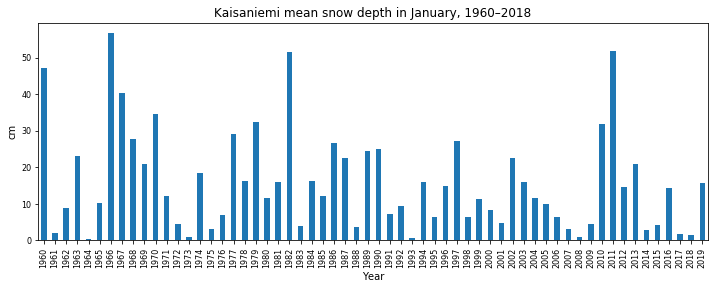

In [3]:
# plotting graphics to get an idea of the data
# recommended reading https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html 
# and 
# https://pbpython.com/effective-matplotlib.html

mpl.rcParams.update({'text.color' : "black", 'axes.labelcolor' : "black"})

# direct quick plotting of a pandas dataframe
fig00, ax = plt.subplots( figsize=(12,4)) 

jan_means.plot(kind='bar', x=jan_means.index, y='Snow depth (cm)', ax=ax )

ax.set(title='Kaisaniemi mean snow depth in January, 1960–2018', ylabel='cm')

ax.tick_params(axis='both', labelsize=8)

fig00



In [4]:

# get unique years from datetime index
years = kaisaniemi_holidays.index.year.unique()

# matplotlib uses inches for measurements, to use centimeters, divide
inch = 2.54000508001
WIDTH = 12 / inch
HEIGHT = 85 / inch

margins = make_margins(WIDTH, HEIGHT, left=2.5/inch, right=0.5/inch, top=2.5/inch, bottom=1/inch )

# since the graphic has a black background text needs to be  set as white
mpl.rcParams.update({'text.color' : "white", 'axes.labelcolor' : "white"})

mpl.rcParams.update({'font.size' : 8})


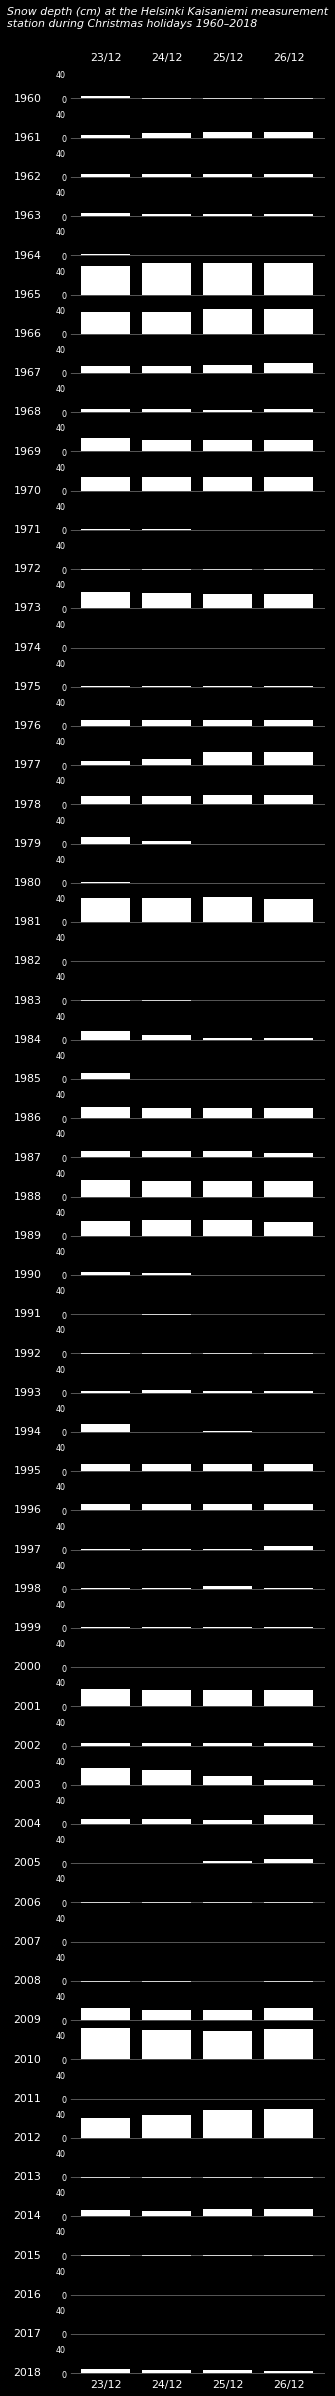

In [5]:

# make as many subplots as there is unique years

fig02, ax02 = plt.subplots(len(years),1, figsize=(WIDTH,HEIGHT), sharex=True, sharey=True, facecolor='black', gridspec_kw={'hspace': 0.1})

fig02.suptitle('Snow depth (cm) at the Helsinki Kaisaniemi measurement\nstation during Christmas holidays 1960–2018', style ='italic', x=0.025, y=0.995, fontsize=11, ha='left')
n = 0
for ax in ax02.flat:
    year = str(years[n])
    entry = kaisaniemi_holidays[year]
    ax.bar(entry['day'], entry['Snow depth (cm)'], color="white", clip_on=False)

    ax.set_facecolor('black')
    
    # set ticks 
    ax.tick_params(axis='both', length=0, color='white', labelcolor='white')
    ax.tick_params(axis='x', labelsize=11)
    if n == 0: ax.tick_params(axis = 'x', labeltop=True)

    ax.axhline(0,0,1, lw=0.5, color='darkgrey')
    ax.xaxis.set_ticks([23, 24, 25, 26])
    ax.yaxis.set_ticks([0, 40])
    ax.set_xticklabels(['23/12', '24/12', '25/12', '26/12'])
    ax.text(-0.22, 0.0, year, color='white', fontsize=11, transform=ax.transAxes)
    n+=1

fig02.subplots_adjust(*margins)


# edgecolor must be set explicitly in "savefig" to keep the black background
fig02.savefig('fig02_snowbars.png', facecolor=fig02.get_facecolor( ), edgecolor='none')

fig02


1960 1960-12-23    4.0
1960-12-24   -1.0
1960-12-25   -1.0
1960-12-26   -1.0
Name: Snow depth (cm), dtype: float64
1961 1961-12-23    4.0
1961-12-24    7.0
1961-12-25    9.0
1961-12-26    9.0
Name: Snow depth (cm), dtype: float64
1962 1962-12-23    5.0
1962-12-24    5.0
1962-12-25    5.0
1962-12-26    5.0
Name: Snow depth (cm), dtype: float64
1963 1963-12-23    5.0
1963-12-24    4.0
1963-12-25    4.0
1963-12-26    4.0
Name: Snow depth (cm), dtype: float64
1964 1964-12-23    2.0
1964-12-24    1.0
1964-12-25    1.0
1964-12-26    1.0
Name: Snow depth (cm), dtype: float64
1965 1965-12-23    47.0
1965-12-24    52.0
1965-12-25    51.0
1965-12-26    51.0
Name: Snow depth (cm), dtype: float64
1966 1966-12-23    36.0
1966-12-24    35.0
1966-12-25    41.0
1966-12-26    40.0
Name: Snow depth (cm), dtype: float64
1967 1967-12-23    12.0
1967-12-24    12.0
1967-12-25    13.0
1967-12-26    17.0
Name: Snow depth (cm), dtype: float64
1968 1968-12-23    5.0
1968-12-24    5.0
1968-12-25    3.0
1968-12-2

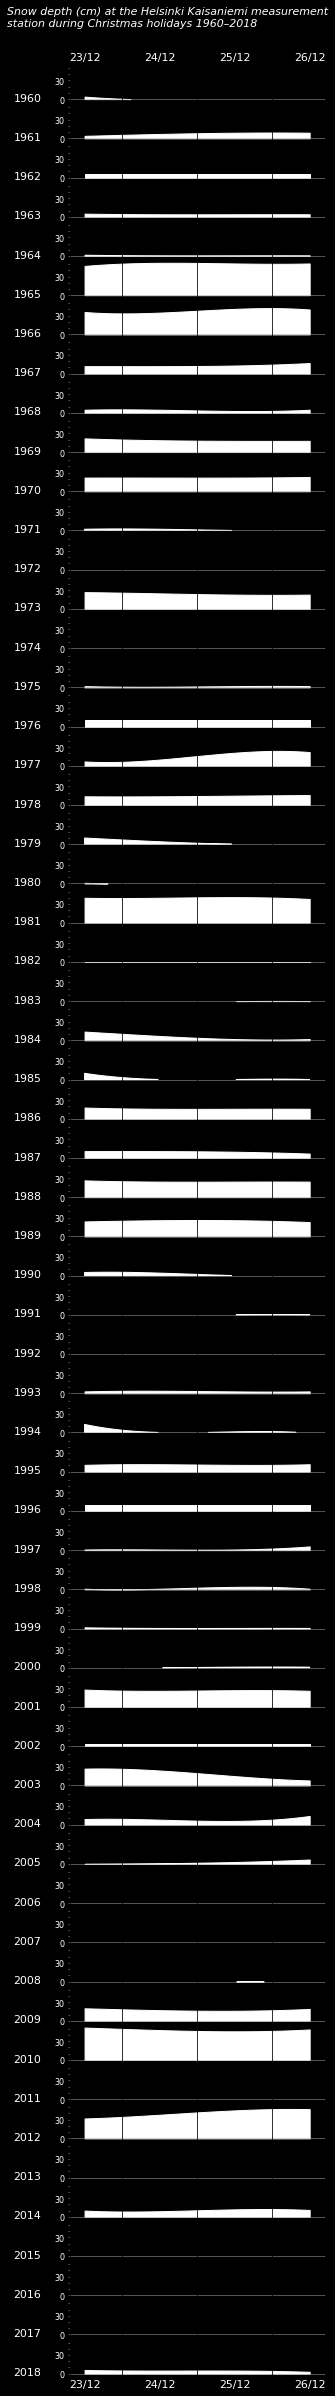

In [6]:
# Matplotlib has no built-in line smoothing so it uses scipy spline interpolation
from scipy.interpolate import make_interp_spline, BSpline

# set up graphic with shared x and y axes and correct number of subplots in one column

fig03, ax03 = plt.subplots(len(years),1, figsize=(WIDTH,HEIGHT), sharex=True, sharey=True, facecolor='black', gridspec_kw={'hspace': 0.1})

fig03.suptitle('Snow depth (cm) at the Helsinki Kaisaniemi measurement\nstation during Christmas holidays 1960–2018', style ='italic', x=0.025, y=0.995, fontsize=11, ha='left')

n = 0
for ax in ax03.flat:
    year = str(years[n])
    entry = kaisaniemi_holidays[year]
    print(years[n], entry['Snow depth (cm)'])
    # scipy spline interpolation to get smooth lines
    # 50 represents number of points to make between entry['day'].min and entry['day'].max
    xnew = np.linspace(entry.index.day.min(), entry.index.day.max(), 50) 
    spl = make_interp_spline(entry.index.day, entry['Snow depth (cm)'], k=3)  # type: BSpline
    snowdepth_smooth = spl(xnew)

    # interpolation can create negative values which should be masked out
    snowdepth_smooth = np.ma.masked_less(snowdepth_smooth, 0.0)
    
    # set ticks, background & grid 
    ax.set_facecolor('black')
    ax.tick_params(axis='both', length=0, color='white', labelcolor='white')
    ax.tick_params(axis='x', labelsize=11)
    
    # show top labels for first graphic 
    if n == 0: ax.tick_params(axis = 'x', labeltop=True)

    ax.set_xlim(left=22.8, right=26.2)
    ax.xaxis.set_ticks([23, 24, 25, 26])

    # manually set tick labels because it is easier
    ax.set_xticklabels(['23/12', '24/12', '25/12', '26/12'])

    # draw grid lines between dates
    ax.xaxis.set_minor_locator(plt.FixedLocator([23.5, 24.5, 25.5]))
    ax.grid(which='minor', axis='x', color='black', zorder=1.1)

    ax.tick_params(axis='y', length = 2, which='both', color='darkgrey', width=0.5)

    ax.yaxis.set_minor_locator(plt.MultipleLocator(10))
    ax.yaxis.set_major_locator(plt.MaxNLocator(2))

    ax.text(-0.22, 0.0, year, color='white', fontsize=11, transform=ax.transAxes)
    
    # draw a baseline 
    ax.axhline(0,0,1, lw=0.5, color='darkgrey', zorder=-1.1, clip_on=False)

    # draw a filled line chart from zero to snow depth with "fillbetween" function
    ax.fill_between(xnew, 0, snowdepth_smooth, color="white", clip_on=False, zorder=-2.1)
    
    n+=1

fig03.subplots_adjust(*margins)

fig03.savefig('fig03_snowbars_smooth.pdf', facecolor=fig03.get_facecolor( ), edgecolor='none')

fig03
